In [1]:
import pandas as pd
import seaborn as sns
df = pd.read_csv('degrees-that-pay-back.csv')

In [2]:
df.isnull().values.any()

False

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Undergraduate Major                                50 non-null     object 
 1   Starting Median Salary                             50 non-null     object 
 2   Mid-Career Median Salary                           50 non-null     object 
 3   Percent change from Starting to Mid-Career Salary  50 non-null     float64
 4   Mid-Career 10th Percentile Salary                  50 non-null     object 
 5   Mid-Career 25th Percentile Salary                  50 non-null     object 
 6   Mid-Career 75th Percentile Salary                  50 non-null     object 
 7   Mid-Career 90th Percentile Salary                  50 non-null     object 
dtypes: float64(1), object(7)
memory usage: 3.2+ KB


,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Accounting,"$46,000.00","$77,100.00",67.6,"$42,200.00","$56,100.00","$108,000.00","$152,000.00"
1,Aerospace Engineering,"$57,700.00","$101,000.00",75.0,"$64,300.00","$82,100.00","$127,000.00","$161,000.00"
2,Agriculture,"$42,600.00","$71,900.00",68.8,"$36,300.00","$52,100.00","$96,300.00","$150,000.00"
3,Anthropology,"$36,800.00","$61,500.00",67.1,"$33,800.00","$45,500.00","$89,300.00","$138,000.00"
4,Architecture,"$41,600.00","$76,800.00",84.6,"$50,600.00","$62,200.00","$97,000.00","$136,000.00"


In [4]:
df = df.drop(columns = ['Mid-Career Median Salary', 'Percent change from Starting to Mid-Career Salary', 'Mid-Career 10th Percentile Salary', 'Mid-Career 25th Percentile Salary', 'Mid-Career 75th Percentile Salary', 'Mid-Career 90th Percentile Salary'])

In [5]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Undergraduate Major     50 non-null     object
 1   Starting Median Salary  50 non-null     object
dtypes: object(2)
memory usage: 928.0+ bytes


,Undergraduate Major,Starting Median Salary
0,Accounting,"$46,000.00"
1,Aerospace Engineering,"$57,700.00"
2,Agriculture,"$42,600.00"
3,Anthropology,"$36,800.00"
4,Architecture,"$41,600.00"


In [6]:
df['Starting Median Salary'] = df['Starting Median Salary'].map(lambda x: x.lstrip('$').rstrip(''))

In [7]:
df['Starting Median Salary']=df['Starting Median Salary'].str.replace(',','')

In [8]:
df['Starting Median Salary'] = df['Starting Median Salary'].astype(float)

In [9]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Undergraduate Major     50 non-null     object 
 1   Starting Median Salary  50 non-null     float64
dtypes: float64(1), object(1)
memory usage: 928.0+ bytes


,Undergraduate Major,Starting Median Salary
0,Accounting,46000.0
1,Aerospace Engineering,57700.0
2,Agriculture,42600.0
3,Anthropology,36800.0
4,Architecture,41600.0


In [10]:
df["Starting Median Salary"].quantile(0.999999999999)

74299.99999945611

In [11]:
df["Starting Median Salary"].quantile(0.75)

49875.0

In [12]:
df["Starting Median Salary"].quantile(0.50)

40850.0

In [13]:
df["Starting Median Salary"].quantile(0.25)

37050.0

In [14]:
df["Starting Median Salary"].quantile(0.000000000000001)

34000.00000000001

<AxesSubplot:xlabel='Starting Median Salary', ylabel='Count'>

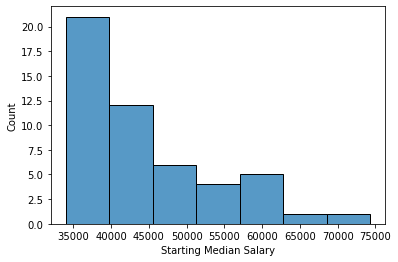

In [15]:
sns.histplot(df["Starting Median Salary"])

In [16]:
df = df.sort_values(by="Starting Median Salary", ascending = False)

In [17]:
df = df[:5]

In [18]:
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 43 to 38
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Undergraduate Major     5 non-null      object 
 1   Starting Median Salary  5 non-null      float64
dtypes: float64(1), object(1)
memory usage: 120.0+ bytes


,Undergraduate Major,Starting Median Salary
43,Physician Assistant,74300.0
8,Chemical Engineering,63200.0
12,Computer Engineering,61400.0
19,Electrical Engineering,60900.0
38,Mechanical Engineering,57900.0


<AxesSubplot:xlabel='Starting Median Salary', ylabel='Undergraduate Major'>

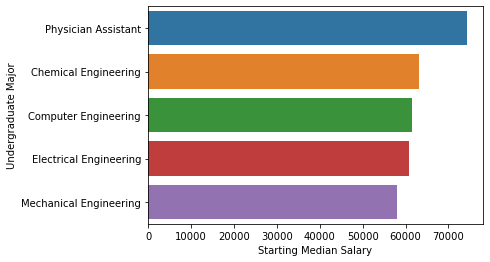

In [19]:
sns.barplot(data = df, x = "Starting Median Salary", y = "Undergraduate Major")